In [39]:
import os

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import sklearn.ensemble
import sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer as Vectorizer

from cross_validation import *

BOW_FILE = "bow_columns_list_problem2.txt"
REGRESSION_PKL_FILE = "regression_mdl_problem2.pkl"
WEBSITE_MAPPING = {'imdb': 0, 'amazon': 1, 'yelp': 2}
RANDOM_STATE = 132
NUM_FOLDS = 6

N_JOBS = -1

def make_bag_of_words(text_series, ngram_range=(1, 1), max_features=1000, binary=True):
    vectorizer = Vectorizer(ngram_range=ngram_range, max_features=max_features, stop_words='english', binary=binary)
    bow_matrix = vectorizer.fit_transform(text_series)
    bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    return bow_df

def find_min_tuple(tuples, place=1):
    min_tuple = ()
    min = 1000000
    for tup in tuples:
        if tup[place] < min:
            min = tup[place]
            min_tuple = tup
    return min_tuple

In [40]:
def test_n_estimators(x_train_array, y_train_array, range_list):
    tuples = []
    for n_estimators in range_list:
        model = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators)
        train_err_per_fold, test_error_per_fold = train_models_and_calc_scores_for_n_fold_cv(model, x_train_array, y_train_array.ravel(), n_folds=NUM_FOLDS, random_state=RANDOM_STATE)
        avg_test_error = np.average(test_error_per_fold)
        avg_train_error = np.average(train_err_per_fold)

        new_tuple = (n_estimators, avg_test_error, avg_train_error)
        tuples.append(new_tuple)
        print(new_tuple)


    return tuples
    

def test_max_depth(x_train_array, y_train_array, range_list):
    tuples = []
    for max_depth in range_list:
        model = sklearn.ensemble.RandomForestClassifier(max_depth=max_depth)
        train_err_per_fold, test_error_per_fold = train_models_and_calc_scores_for_n_fold_cv(model, x_train_array, y_train_array.ravel(), n_folds=NUM_FOLDS, random_state=RANDOM_STATE)
        avg_test_error = np.average(test_error_per_fold)
        avg_train_error = np.average(train_err_per_fold)

        new_tuple = (max_depth, avg_test_error, avg_train_error)
        tuples.append(new_tuple)
        print(new_tuple)

        
    return tuples


def test_min_samples_split(x_train_array, y_train_array, range_list):
    tuples = []
    for min_samples_split in range_list:
        model = sklearn.ensemble.RandomForestClassifier(min_samples_split=min_samples_split)
        train_err_per_fold, test_error_per_fold = train_models_and_calc_scores_for_n_fold_cv(model, x_train_array, y_train_array.ravel(), n_folds=NUM_FOLDS, random_state=RANDOM_STATE)
        avg_test_error = np.average(test_error_per_fold)
        avg_train_error = np.average(train_err_per_fold)

        new_tuple = (min_samples_split, avg_test_error, avg_train_error)
        tuples.append(new_tuple)
        print(new_tuple)

        
    return tuples


def test_min_samples_leaf(x_train_array, y_train_array, range_list):
    tuples = []
    for min_samples_leaf in range_list:
        model = sklearn.ensemble.RandomForestClassifier(min_samples_leaf=min_samples_leaf)
        train_err_per_fold, test_error_per_fold = train_models_and_calc_scores_for_n_fold_cv(model, x_train_array, y_train_array.ravel(), n_folds=NUM_FOLDS, random_state=RANDOM_STATE)
        avg_test_error = np.average(test_error_per_fold)
        avg_train_error = np.average(train_err_per_fold)

        new_tuple = (min_samples_leaf, avg_test_error, avg_train_error)
        tuples.append(new_tuple)
        print(new_tuple)

        
    return tuples

In [41]:
def plot_graph(tuples, xaxis='X-axis', yaxis='Y-axis', title='Title'):
    for tup in tuples:
        x, y1, y2 = tup
        plt.plot(x, y1, marker='o')
        plt.plot(x, y2, marker='x')
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)
    plt.show()


In [42]:
data_dir = "./data_reviews/"
x_train_df = pd.read_csv(os.path.join(data_dir, 'x_train.csv'))
y_train_df = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))
text = x_train_df['text']

# choose bow
bow_max_features = 100
bow = make_bag_of_words(x_train_df['text'], max_features=bow_max_features)
# export as list
# with open(BOW_FILE, 'w') as file:
#     for column in bow.columns:
#         file.write(column + '\n')
# make final training data
x_train_df = pd.concat([x_train_df, bow], axis=1).drop(columns=['text', 'website_name'], axis=1)
# x_train_df['website_name'].replace(website_mapping, inplace=True)
x_train_array = x_train_df.to_numpy()
y_train_array = y_train_df.to_numpy()

In [43]:
## RANGES
n_estimators_range = range(10, 500, 10)
max_depth_range = range(100, 500, 10)
min_samples_split_range = range(1, 11, 1)
min_samples_leaf_range = range(1, 11, 1)

(10, 0.29625, 0.17983334)
(20, 0.29333332, 0.17683333)
(30, 0.29416665, 0.17525)
(40, 0.29166666, 0.17458333)
(50, 0.29291666, 0.17433333)
(60, 0.29, 0.17433333)
(70, 0.29041663, 0.17425)
(80, 0.29125, 0.17425)
(90, 0.29291666, 0.17416668)
(100, 0.29208332, 0.17416668)
(110, 0.29, 0.17425)
(120, 0.28875, 0.17416668)
(130, 0.2879167, 0.17416668)
(140, 0.28875, 0.17416668)
(150, 0.29, 0.17416668)
(160, 0.28791666, 0.17416668)
(170, 0.2904167, 0.17416668)
(180, 0.28833333, 0.17416668)
(190, 0.28958336, 0.17416668)
(200, 0.28666666, 0.17416668)
(210, 0.29, 0.17416668)
(220, 0.28625003, 0.17416668)
(230, 0.28541666, 0.17416668)
(240, 0.285, 0.17416668)
(250, 0.28791666, 0.17416668)
(260, 0.28875002, 0.17416668)
(270, 0.28833336, 0.17416668)
(280, 0.28833333, 0.17416668)
(290, 0.28541666, 0.17416668)
(300, 0.28833333, 0.17416668)
(310, 0.285, 0.17416668)
(320, 0.28916666, 0.17416668)
(330, 0.29125002, 0.17416668)
(340, 0.28541666, 0.17416668)
(350, 0.2875, 0.17416668)
(360, 0.28833333, 0.174

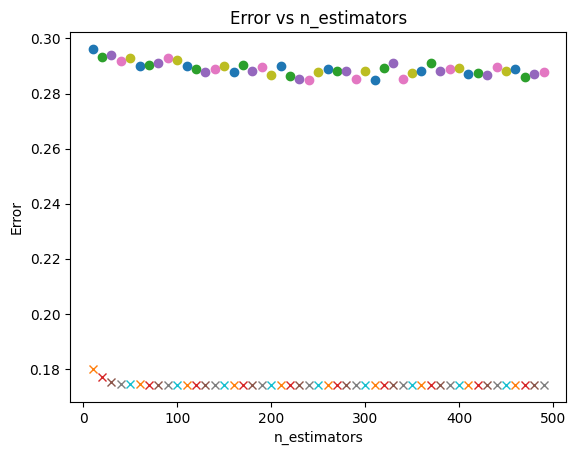

In [44]:
tuples = test_n_estimators(x_train_array, y_train_array, n_estimators_range)
plot_graph(tuples, yaxis='Error', xaxis='n_estimators', title='Error vs n_estimators')

(100, 0.28833336, 0.17416668)
(110, 0.28916666, 0.17416668)
(120, 0.29458335, 0.17416668)
(130, 0.28625003, 0.17416668)
(140, 0.28875, 0.17416668)
(150, 0.29166666, 0.17425)
(160, 0.2895833, 0.17416668)
(170, 0.2879167, 0.17416668)
(180, 0.28833333, 0.17425)
(190, 0.29375, 0.17416668)
(200, 0.29, 0.17416668)
(210, 0.29125, 0.17416668)
(220, 0.29041666, 0.17416668)
(230, 0.29041666, 0.17416668)
(240, 0.28791666, 0.17425)
(250, 0.28833333, 0.17433333)
(260, 0.29125, 0.17416668)
(270, 0.28958336, 0.17416668)
(280, 0.28958333, 0.17425)
(290, 0.28958336, 0.17416668)
(300, 0.2879167, 0.17416668)
(310, 0.29166666, 0.17416668)
(320, 0.28791666, 0.17416668)
(330, 0.285, 0.17416668)
(340, 0.29041666, 0.17416668)
(350, 0.28708333, 0.17416668)
(360, 0.29, 0.17416668)
(370, 0.29625002, 0.17416668)
(380, 0.29125002, 0.17416668)
(390, 0.28916666, 0.17416668)
(400, 0.28958333, 0.17416668)
(410, 0.28958336, 0.17416668)
(420, 0.29125, 0.17416668)
(430, 0.2904167, 0.17416668)
(440, 0.2879167, 0.17416668)

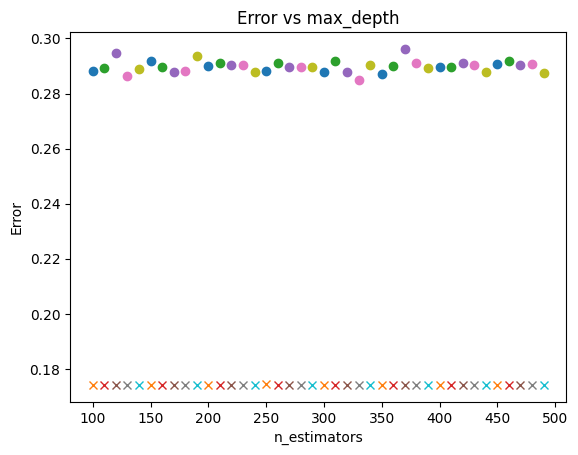

In [45]:
tuples = test_max_depth(x_train_array, y_train_array, max_depth_range)
plot_graph(tuples, yaxis='Error', xaxis='max_depth', title='Error vs max_depth')

(1, 0.28916666, 0.17416668)
(2, 0.28666666, 0.17441668)
(3, 0.28916666, 0.17549999)
(4, 0.28958333, 0.17716666)
(5, 0.29208335, 0.18033333)
(6, 0.28958333, 0.18391667)
(7, 0.28875, 0.18708332)
(8, 0.28666666, 0.19208334)
(9, 0.28666666, 0.1955)
(10, 0.28333333, 0.19775002)


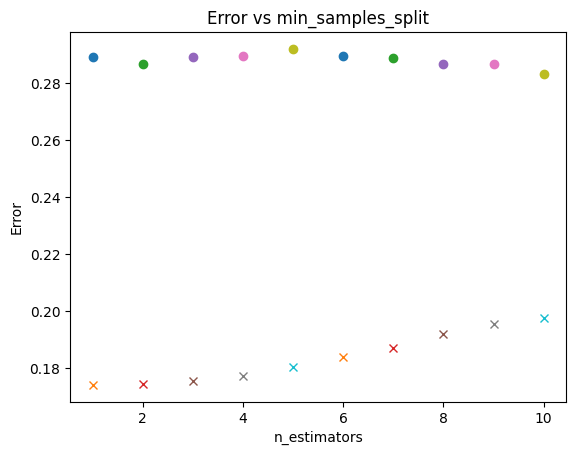

In [46]:
tuples = test_min_samples_split(x_train_array, y_train_array, min_samples_split_range)
plot_graph(tuples, yaxis='Error', xaxis='min_samples_split', title='Error vs min_samples_split')

(1, 0.30708334, 0.22066669)
(2, 0.31083333, 0.20625)
(3, 0.30458334, 0.19483334)
(4, 0.31166667, 0.19175)
(5, 0.2975, 0.18691666)
(6, 0.29416668, 0.18550001)
(7, 0.30041668, 0.18525)
(8, 0.29583332, 0.18241668)
(9, 0.30125, 0.18075)
(10, 0.29250002, 0.18016668)


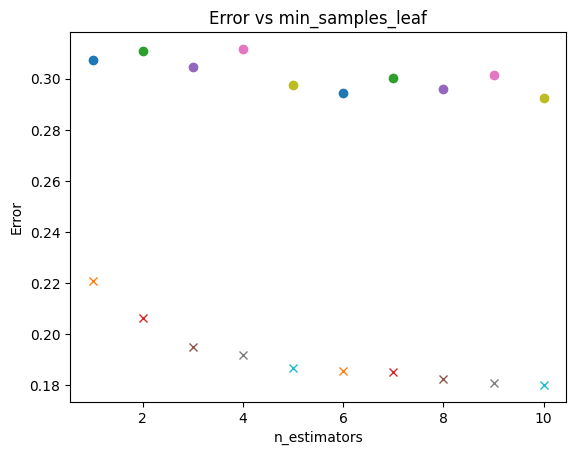

In [47]:
tuples = test_min_samples_leaf(x_train_array, y_train_array, min_samples_leaf_range)
plot_graph(tuples, yaxis='Error', xaxis='min_samples_leaf', title='Error vs min_samples_leaf')